In [11]:
%qtconsole

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 
from scipy.io.matlab import loadmat

import cp

In [2]:
mat = loadmat('data/bread/brod.mat')
X = mat['X'].reshape([10,11,8])

In [3]:
T = cp.KruskalTensor(X.shape, rank=3)
X_predict = T.cp_als(X, tf.train.GradientDescentOptimizer(0.1), epochs=1000)

100%|██████████| 1000/1000 [00:01<00:00, 593.18it/s]

final loss: 32.17343


In [10]:
np.linalg.norm(X - X_predict)

32.17343243385114

# Compare to sk-tensor output

In [21]:
X_sktensor = np.load('./data/bread/sk_cp.npy').reshape([10,11,8])

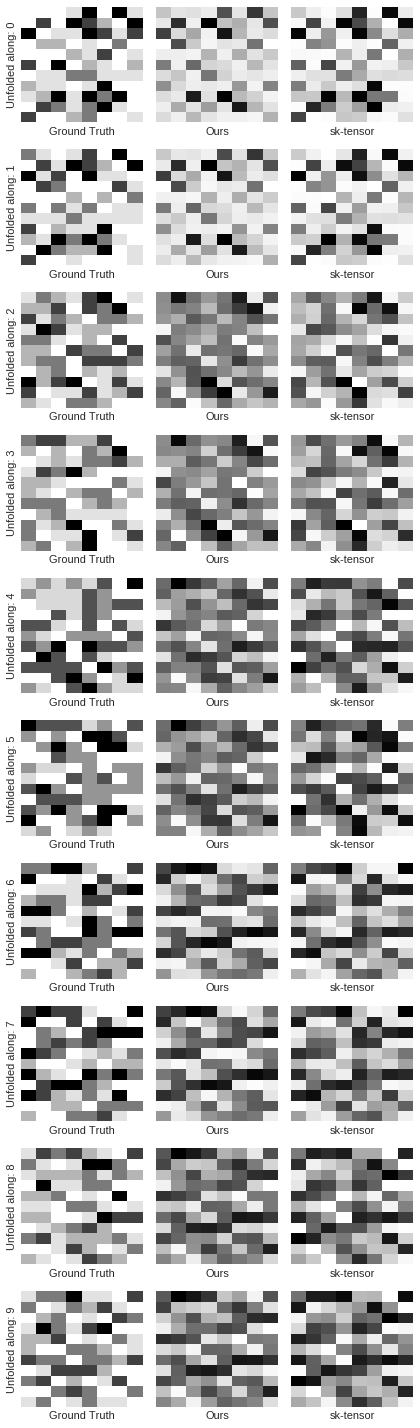

In [31]:
plt.rcParams['figure.figsize'] = (6, 20)

for n in range(10):
    plt.subplot(10,3,(3*n)+1, ylabel='Unfolded along: {}'.format(n), xlabel='Ground Truth')
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.pcolor(X[n,:,:])
    
    plt.subplot(10,3,(3*n)+2, xlabel='Ours')
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.pcolor(X_predict[n,:,:])
    
    plt.subplot(10,3,(3*n)+3, xlabel='sk-tensor')
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.pcolor(X_sktensor[n,:,:])
    
plt.tight_layout()
plt.show()

# Unfold along 1st order

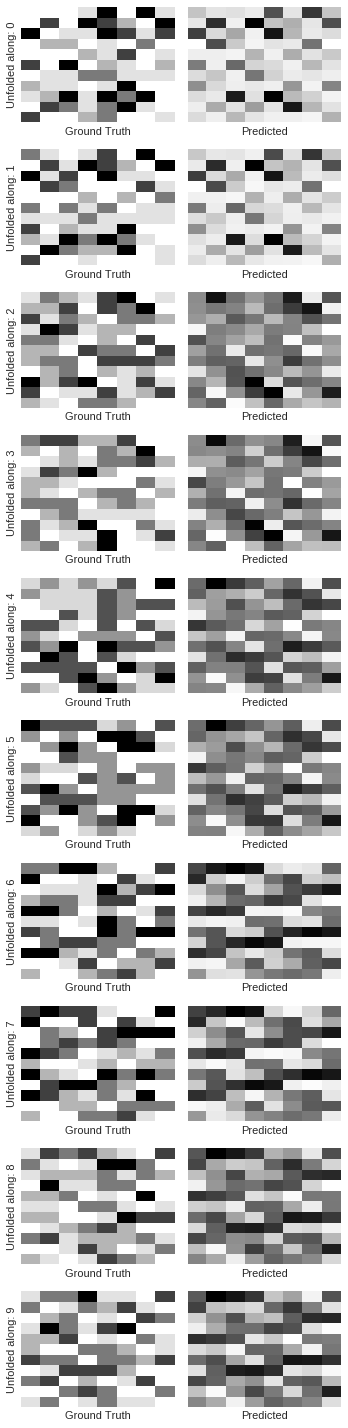

In [28]:
plt.rcParams['figure.figsize'] = (5, 20)

for n in range(10):
    plt.subplot(10,2,(2*n)+1, ylabel='Unfolded along: {}'.format(n), xlabel='Ground Truth')
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.pcolor(X[n,:,:])
    
    plt.subplot(10,2,(2*n)+2, xlabel='Predicted')
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.pcolor(X_predict[n,:,:])
    
plt.tight_layout()
plt.show()

# Unfold along 2nd order

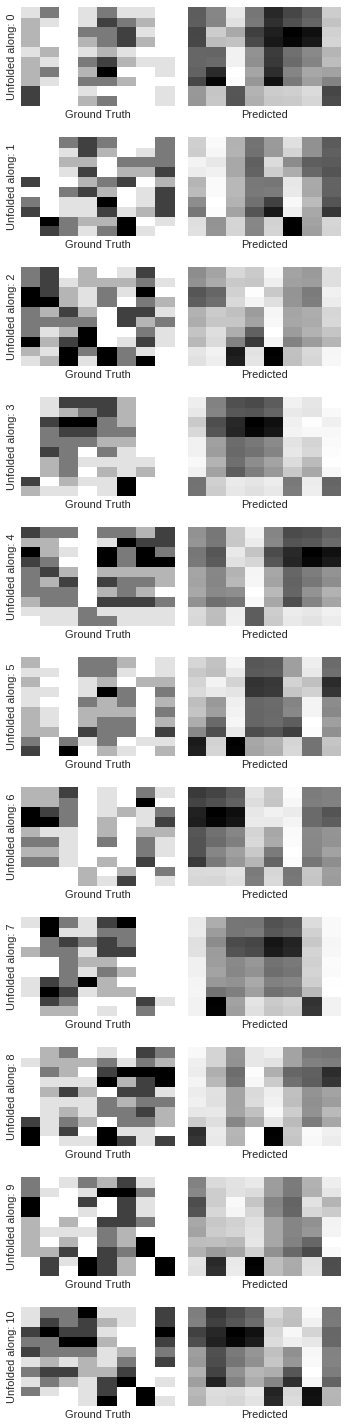

In [7]:
plt.rcParams['figure.figsize'] = (5, 20)

for n in range(11):
    plt.subplot(11,2,(2*n)+1, ylabel='Unfolded along: {}'.format(n), xlabel='Ground Truth')
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.pcolor(X[:,n,:])
    
    plt.subplot(11,2,(2*n)+2, xlabel='Predicted')
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.pcolor(X_predict[:,n,:])
    
plt.tight_layout()
plt.show()

# Unfold along 3rd order

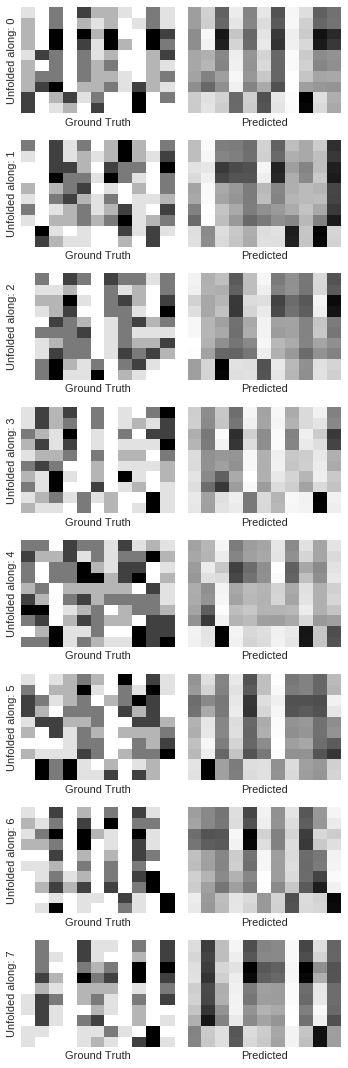

In [6]:
plt.rcParams['figure.figsize'] = (5, 15)

for n in range(8):
    plt.subplot(8,2,(2*n)+1, ylabel='Unfolded along: {}'.format(n), xlabel='Ground Truth')
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.pcolor(X[:,:,n])
    
    plt.subplot(8,2,(2*n)+2, xlabel='Predicted')
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.pcolor(X_predict[:,:,n])
    
plt.tight_layout()
plt.show()